/tmp/ipython-input-512907057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_counts.index, y=family_counts.values, palette='viridis')


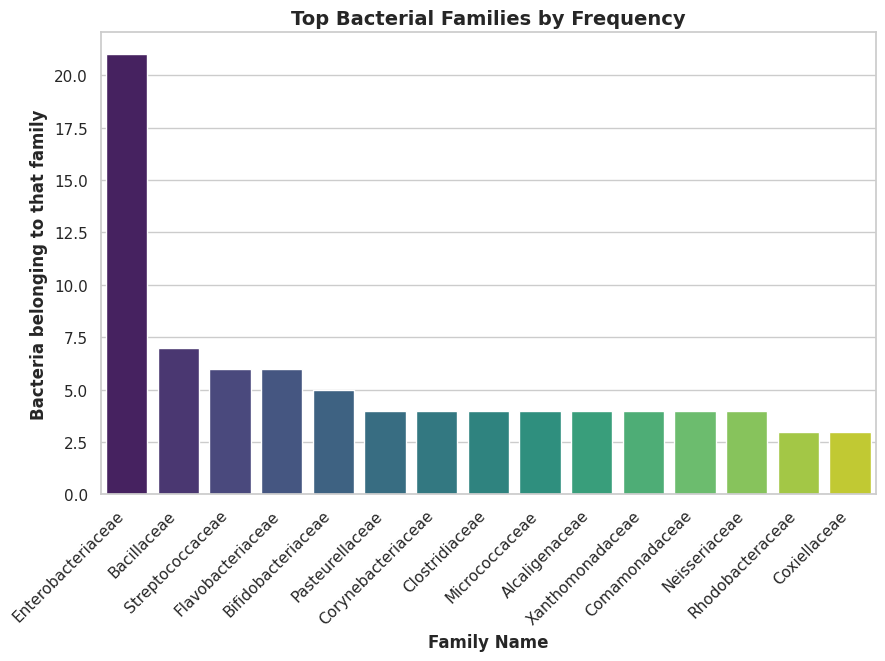

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bacteria_list_200.csv')
family_counts = df['Family'].value_counts().head(15)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=family_counts.index, y=family_counts.values, palette='viridis')
plt.xlabel('Family Name', fontsize=12, fontweight='bold')
plt.ylabel('Bacteria belonging to that family', fontsize=12, fontweight='bold')
plt.title('Top Bacterial Families by Frequency', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

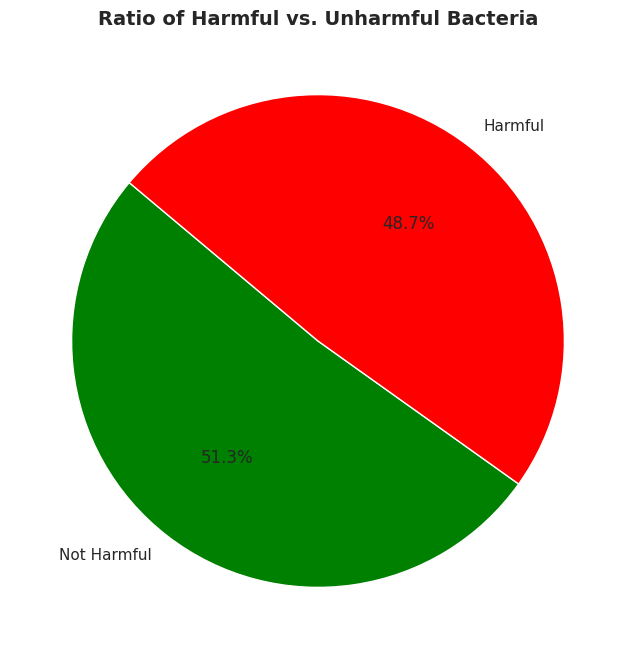

In [62]:
impact_counts = df['Harmful to Humans'].str.strip().str.capitalize().value_counts()
labels = ['Not Harmful' if x == 'No' else 'Harmful' for x in impact_counts.index]
colors = ['green' if x == 'No' else 'red' for x in impact_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(impact_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Ratio of Harmful vs. Unharmful Bacteria', fontsize=14, fontweight='bold')
plt.show()

/tmp/ipython-input-618626730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], palette='viridis')


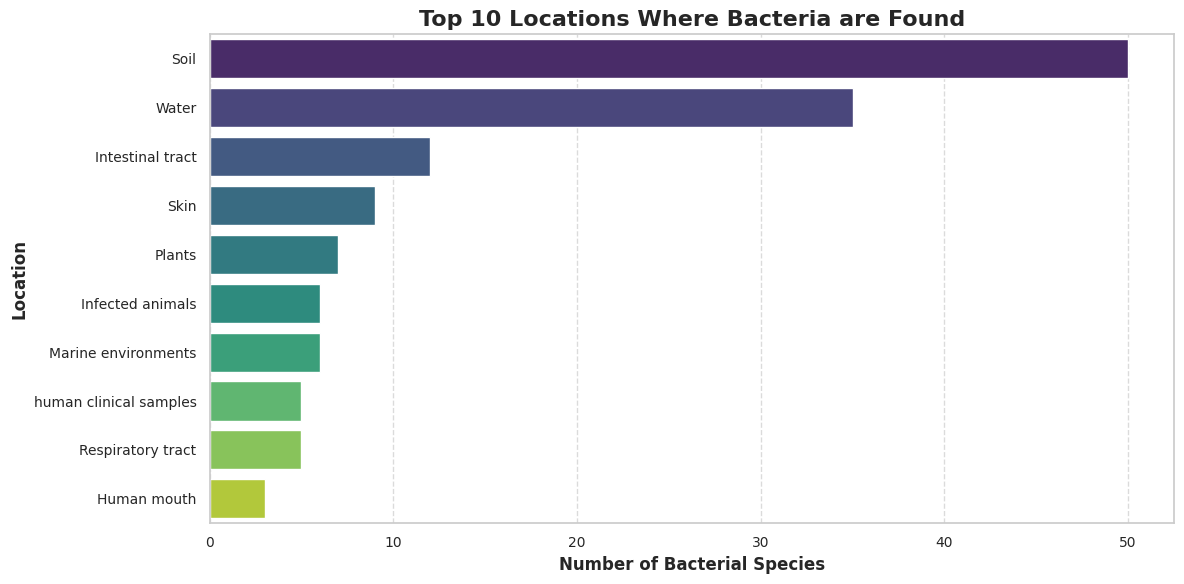

In [63]:
location_series = df['Where Found'].str.split(',').explode().str.strip()
location_counts = location_series.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], palette='viridis')
plt.title('Top 10 Locations Where Bacteria are Found', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bacterial Species', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


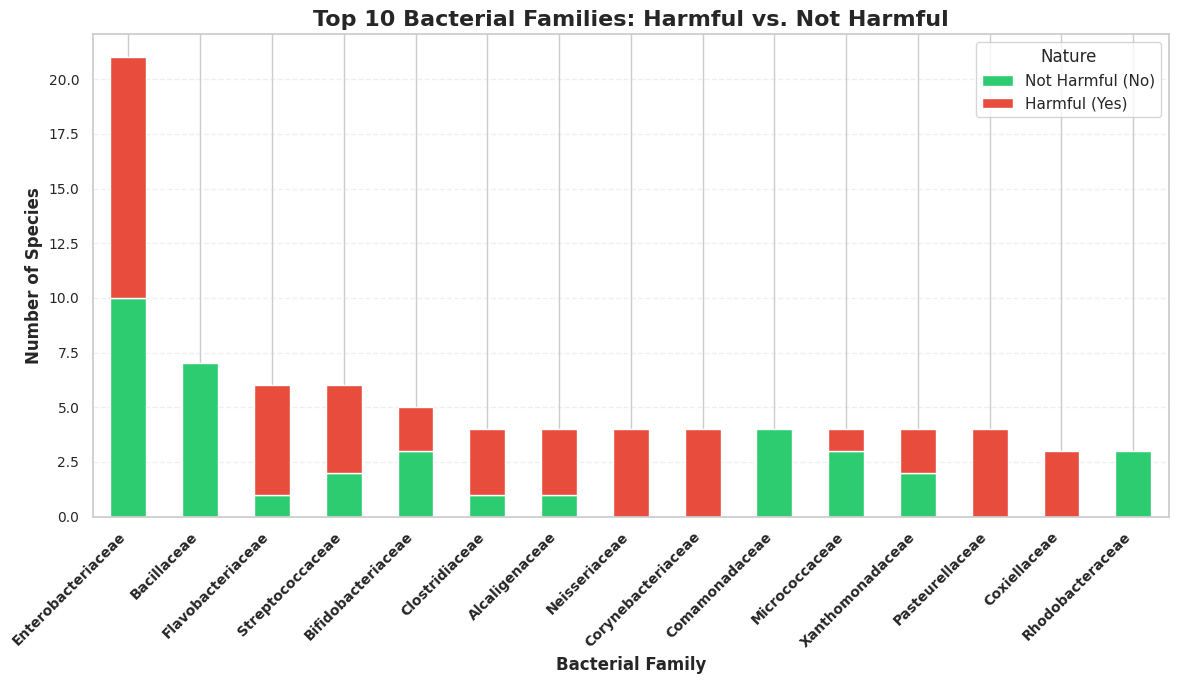

In [64]:
df['Harmful to Humans'] = df['Harmful to Humans'].str.strip().str.capitalize()
top_10_families = df['Family'].value_counts().nlargest(15).index
df_top_10 = df[df['Family'].isin(top_10_families)]
stacked_data = df_top_10.groupby(['Family', 'Harmful to Humans']).size().unstack(fill_value=0)
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False).drop(columns='Total')
colors = []
if 'No' in stacked_data.columns: colors.append('#2ecc71') # Green
if 'Yes' in stacked_data.columns: colors.append('#e74c3c') # Red
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)
plt.title('Top 10 Bacterial Families: Harmful vs. Not Harmful', fontsize=16, fontweight='bold')
plt.xlabel('Bacterial Family', fontsize=12, fontweight='bold')
plt.ylabel('Number of Species', fontsize=12, fontweight='bold')
plt.legend(['Not Harmful (No)', 'Harmful (Yes)'], title='Nature', frameon=True)
plt.xticks(rotation=45, ha='right',fontweight='bold', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

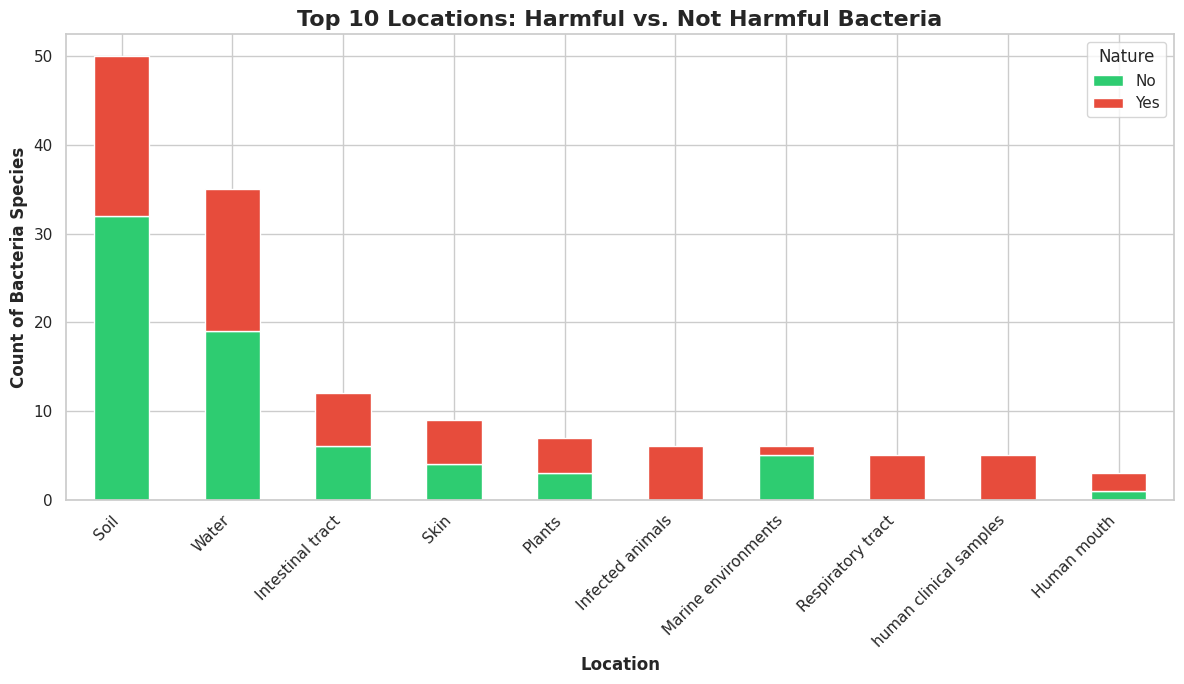

In [65]:
df['Harmful to Humans'] = df['Harmful to Humans'].str.strip().str.capitalize()
df['Where Found'] = df['Where Found'].replace('Soil, Water', 'Soil, Water')
df_exploded = df.assign(temp_loc=df['Where Found'].str.split(',')).explode('temp_loc')
df_exploded['Where Found'] = df_exploded['temp_loc'].str.strip()
top_10_locations = df_exploded['Where Found'].value_counts().nlargest(10).index
df_top_10 = df_exploded[df_exploded['Where Found'].isin(top_10_locations)]

stacked_data = df_top_10.groupby(['Where Found', 'Harmful to Humans']).size().unstack(fill_value=0)
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False).drop(columns='Total')

colors_map = {'No': '#2ecc71', 'Yes': '#e74c3c'}
plot_colors = [colors_map[col] for col in stacked_data.columns]

ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 7), color=plot_colors)

plt.title('Top 10 Locations: Harmful vs. Not Harmful Bacteria', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12, fontweight='bold')
plt.ylabel('Count of Bacteria Species', fontsize=12, fontweight='bold')
plt.legend(title='Nature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()